#Instructions:

Because of storage limitations, you must upload the "Troubled_Properties_Analysis_moco.csv" file from the "Software and Analysis" folder and load it into this notebook. Using the folder icon on the left menu bar open the "Files" tab. Then click on document with an arrow icon to upload the file to this server session. The uploaded file will appear under "sample_data."

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
#Read in Dataset
Toubled_Properties_df = pd.read_csv("Troubled_Properties_Analysis_moco.csv")
Toubled_Properties_df

,License Number,Community Name,Street Address,City,Zip Code,Case Number,Longitude,Latitude,First Inspection Date,Next Inspection Date,...,Compliant,Unit Count,Units Inspected,Average Violations Per Unit,Severity Index,No Violations Observed,Infested Units Percentage,Units with Mold,Analysis Rating,Location
0,62427,The Veridian At Silver Spring Metro,1133 East West Hwy,Silver Spring,20910,178097,-77.027783,38.989347,6/15/23,NaN,...,1,457,110,0.54,0.72,68,0.00,0.00,compliant,"(38.9893, -77.0278)"
1,17200,Seneca Ridge,19568 Scenery Dr,Germantown,20876,177536,-77.234887,39.176872,4/13/23,NaN,...,1,71,58,1.62,1.13,26,0.05,0.00,compliant,"(39.1769, -77.2349)"
2,17632,The Point At Germantown,2 Observation Ct,Germantown,20876,175575,-77.247494,39.192140,3/29/23,NaN,...,1,218,63,0.85,1.11,28,0.03,0.00,compliant,"(39.1921, -77.2475)"
3,17292,Summit Hills,8484 16Th St,Silver Spring,20910,178095,0.000000,0.000000,5/23/23,NaN,...,1,112,269,2.80,1.88,30,0.03,0.00,troubled,"(0.0, 0.0)"
4,150981,"Clareton, The",4740 BRADLEY BLVD,CHEVY CHASE,20815,171024,-77.094244,38.977618,2/10/22,NaN,...,1,100,18,0.11,0.27,16,0.00,0.00,compliant,"(38.9776, -77.0942)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,17467,"Bradford Road, 8701",8701 Bradford Rd,Silver Spring,20901,173305,-77.006675,38.998463,7/11/22,NaN,...,1,3,5,5.00,2.08,0,0.20,0.00,troubled,"(38.9985, -77.0067)"
616,88050,"Georgia Spring, LLC",923 Silver Spring Ave,Silver Spring,20910,158829,-77.025977,38.991672,10/29/19,NaN,...,0,3,3,1.00,0.44,2,0.00,0.00,compliant,"(38.9917, -77.026)"
617,17695,"Silver Spring Avenue, 622",622 Silver Spring Ave,Silver Spring,20910,173290,-77.014752,38.991757,7/5/22,NaN,...,1,5,5,3.20,1.73,1,0.00,0.20,troubled,"(38.9918, -77.0148)"
618,17581,Montgomery Paint Branch I I I,11556 February Cir,Silver Spring,20904,144895,-76.976897,39.046859,4/6/18,NaN,...,0,168,46,1.32,1.12,11,0.02,0.02,compliant,"(39.0469, -76.9769)"


In [ ]:
df_new =Toubled_Properties_df.dropna(axis = 1 )
df_new

,License Number,Community Name,Street Address,City,Zip Code,Case Number,Longitude,Latitude,First Inspection Date,Compliant,Unit Count,Units Inspected,Average Violations Per Unit,Severity Index,No Violations Observed,Infested Units Percentage,Units with Mold,Analysis Rating,Location
0,62427,The Veridian At Silver Spring Metro,1133 East West Hwy,Silver Spring,20910,178097,-77.027783,38.989347,6/15/23,1,457,110,0.54,0.72,68,0.00,0.00,compliant,"(38.9893, -77.0278)"
1,17200,Seneca Ridge,19568 Scenery Dr,Germantown,20876,177536,-77.234887,39.176872,4/13/23,1,71,58,1.62,1.13,26,0.05,0.00,compliant,"(39.1769, -77.2349)"
2,17632,The Point At Germantown,2 Observation Ct,Germantown,20876,175575,-77.247494,39.192140,3/29/23,1,218,63,0.85,1.11,28,0.03,0.00,compliant,"(39.1921, -77.2475)"
3,17292,Summit Hills,8484 16Th St,Silver Spring,20910,178095,0.000000,0.000000,5/23/23,1,112,269,2.80,1.88,30,0.03,0.00,troubled,"(0.0, 0.0)"
4,150981,"Clareton, The",4740 BRADLEY BLVD,CHEVY CHASE,20815,171024,-77.094244,38.977618,2/10/22,1,100,18,0.11,0.27,16,0.00,0.00,compliant,"(38.9776, -77.0942)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,17467,"Bradford Road, 8701",8701 Bradford Rd,Silver Spring,20901,173305,-77.006675,38.998463,7/11/22,1,3,5,5.00,2.08,0,0.20,0.00,troubled,"(38.9985, -77.0067)"
616,88050,"Georgia Spring, LLC",923 Silver Spring Ave,Silver Spring,20910,158829,-77.025977,38.991672,10/29/19,0,3,3,1.00,0.44,2,0.00,0.00,compliant,"(38.9917, -77.026)"
617,17695,"Silver Spring Avenue, 622",622 Silver Spring Ave,Silver Spring,20910,173290,-77.014752,38.991757,7/5/22,1,5,5,3.20,1.73,1,0.00,0.20,troubled,"(38.9918, -77.0148)"
618,17581,Montgomery Paint Branch I I I,11556 February Cir,Silver Spring,20904,144895,-76.976897,39.046859,4/6/18,0,168,46,1.32,1.12,11,0.02,0.02,compliant,"(39.0469, -76.9769)"


# 1. Exploratory Data Analysis (EDA)

<Figure size 1500x500 with 0 Axes>

<Axes: >

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'License Number'),
  Text(1, 0, 'Zip Code'),
  Text(2, 0, 'Case Number'),
  Text(3, 0, 'Longitude'),
  Text(4, 0, 'Latitude'),
  Text(5, 0, 'Compliant'),
  Text(6, 0, 'Unit Count'),
  Text(7, 0, 'Units Inspected'),
  Text(8, 0, 'Average Violations Per Unit'),
  Text(9, 0, 'Severity Index'),
  Text(10, 0, 'No Violations Observed'),
  Text(11, 0, 'Infested Units Percentage'),
  Text(12, 0, 'Units with Mold')])

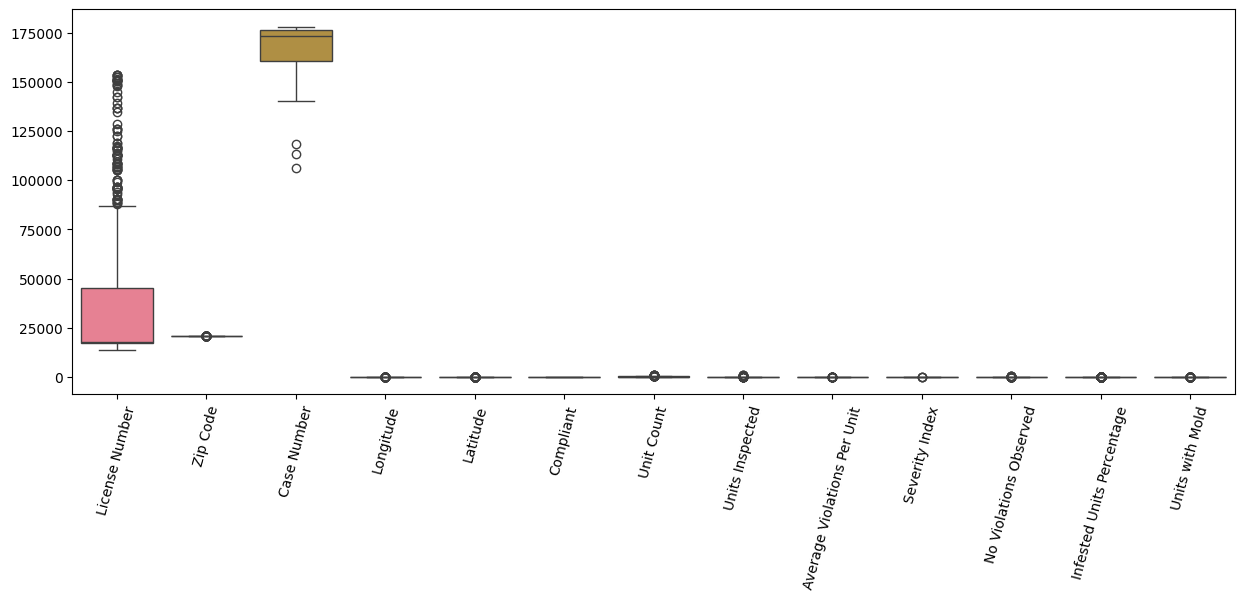

In [ ]:
plt.figure(figsize=[15, 5])
sns.boxplot(data = df_new)

plt.xticks(rotation = 75)
plt.show()

<Axes: >

There are 387 compliant complexes, 82 troubled complexes, 102 at-risk complexes and 49 unclassified complexes


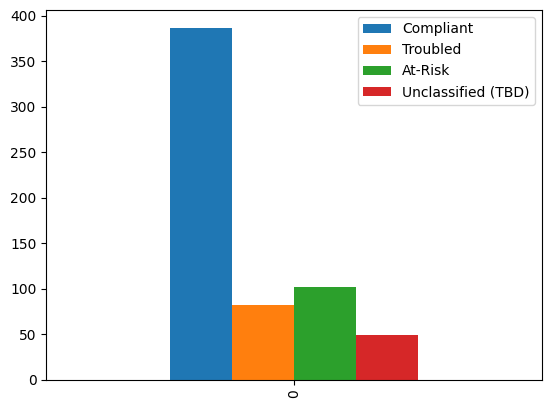

In [ ]:
#Find labels distribution
#file_data_frame[file_data_frame['Price']=='Everyone']

Compliant_Complexes = df_new[df_new['Analysis Rating'] == 'compliant']
Compliant = Compliant_Complexes['Analysis Rating'].count()

Troubled_Complexes = df_new[df_new['Analysis Rating'] == 'troubled']
Troubled = Troubled_Complexes['Analysis Rating'].count()

At_Risk_Complexes = df_new[df_new['Analysis Rating'] == 'at-risk']
At_Risk = At_Risk_Complexes['Analysis Rating'].count()

Unclassified_Complexes = df_new[df_new['Analysis Rating'] == 'TBD']
Unclassified = Unclassified_Complexes['Analysis Rating'].count()

Total_distribution = pd.DataFrame({"Compliant":[Compliant],"Troubled":[Troubled],"At-Risk":[At_Risk],"Unclassified (TBD)":[Unclassified]})
Total_distribution.plot(kind= 'bar')

print(f"There are {Compliant} compliant complexes, {Troubled} troubled complexes, {At_Risk} at-risk complexes and {Unclassified} unclassified complexes")

# 2. Encoding Categorical Targets


In [ ]:
# Encoding the Categorical Data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Analysis = le.fit_transform(df_new['Analysis Rating'])
Analysis

df_new["Analysis Rating"] = pd.Series(Analysis)
df_new

array([2, 2, 2, 3, 2, 0, 2, 0, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 0, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 1, 3, 2, 3, 3,
       2, 0, 2, 2, 1, 3, 1, 2, 3, 1, 0, 3, 0, 3, 3, 2, 1, 3, 2, 2, 2, 0,
       2, 2, 3, 2, 2, 3, 1, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 3, 1, 3, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 1, 3, 2, 2, 2, 2, 0, 2, 3, 3, 1, 2, 2, 2, 2, 3, 0, 3, 2, 2, 2,
       2, 1, 1, 3, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 3, 3, 2, 1, 2, 2, 3, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 3, 1, 2, 3, 2, 3, 0, 3, 2, 3, 3, 1, 2, 3,
       3, 2, 2, 2, 2, 3, 2, 2, 0, 3, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 3, 2, 2, 2, 3, 2, 2, 2, 1,
       3, 0, 1, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 1, 2, 3, 3, 0, 3, 0, 2,
       1, 1, 2, 2, 1, 3, 2, 2, 2, 0, 2, 3, 0, 3, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 0, 2, 0, 2, 2, 1, 0, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2,

<ipython-input-8-b06d69b03852>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Analysis Rating"] = pd.Series(Analysis)


,License Number,Community Name,Street Address,City,Zip Code,Case Number,Longitude,Latitude,First Inspection Date,Compliant,Unit Count,Units Inspected,Average Violations Per Unit,Severity Index,No Violations Observed,Infested Units Percentage,Units with Mold,Analysis Rating,Location
0,62427,The Veridian At Silver Spring Metro,1133 East West Hwy,Silver Spring,20910,178097,-77.027783,38.989347,6/15/23,1,457,110,0.54,0.72,68,0.00,0.00,2,"(38.9893, -77.0278)"
1,17200,Seneca Ridge,19568 Scenery Dr,Germantown,20876,177536,-77.234887,39.176872,4/13/23,1,71,58,1.62,1.13,26,0.05,0.00,2,"(39.1769, -77.2349)"
2,17632,The Point At Germantown,2 Observation Ct,Germantown,20876,175575,-77.247494,39.192140,3/29/23,1,218,63,0.85,1.11,28,0.03,0.00,2,"(39.1921, -77.2475)"
3,17292,Summit Hills,8484 16Th St,Silver Spring,20910,178095,0.000000,0.000000,5/23/23,1,112,269,2.80,1.88,30,0.03,0.00,3,"(0.0, 0.0)"
4,150981,"Clareton, The",4740 BRADLEY BLVD,CHEVY CHASE,20815,171024,-77.094244,38.977618,2/10/22,1,100,18,0.11,0.27,16,0.00,0.00,2,"(38.9776, -77.0942)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,17467,"Bradford Road, 8701",8701 Bradford Rd,Silver Spring,20901,173305,-77.006675,38.998463,7/11/22,1,3,5,5.00,2.08,0,0.20,0.00,3,"(38.9985, -77.0067)"
616,88050,"Georgia Spring, LLC",923 Silver Spring Ave,Silver Spring,20910,158829,-77.025977,38.991672,10/29/19,0,3,3,1.00,0.44,2,0.00,0.00,2,"(38.9917, -77.026)"
617,17695,"Silver Spring Avenue, 622",622 Silver Spring Ave,Silver Spring,20910,173290,-77.014752,38.991757,7/5/22,1,5,5,3.20,1.73,1,0.00,0.20,3,"(38.9918, -77.0148)"
618,17581,Montgomery Paint Branch I I I,11556 February Cir,Silver Spring,20904,144895,-76.976897,39.046859,4/6/18,0,168,46,1.32,1.12,11,0.02,0.02,2,"(39.0469, -76.9769)"


## 2.1 Check Dataset Information

In [ ]:
#dataset stats
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   License Number               620 non-null    int64  
 1   Community Name               620 non-null    object 
 2    Street Address              620 non-null    object 
 3   City                         620 non-null    object 
 4   Zip Code                     620 non-null    int64  
 5   Case Number                  620 non-null    int64  
 6   Longitude                    620 non-null    float64
 7   Latitude                     620 non-null    float64
 8   First Inspection Date        620 non-null    object 
 9   Compliant                    620 non-null    int64  
 10  Unit Count                   620 non-null    int64  
 11  Units Inspected              620 non-null    int64  
 12  Average Violations Per Unit  620 non-null    float64
 13  Severity Index      

In [ ]:
df_new_2 = df_new.drop([" Street Address","License Number","Location","Longitude",
                          "Latitude","Compliant","Community Name",
                          "City","First Inspection Date"], axis = 1)
df_new_2

,Zip Code,Case Number,Unit Count,Units Inspected,Average Violations Per Unit,Severity Index,No Violations Observed,Infested Units Percentage,Units with Mold,Analysis Rating
0,20910,178097,457,110,0.54,0.72,68,0.00,0.00,2
1,20876,177536,71,58,1.62,1.13,26,0.05,0.00,2
2,20876,175575,218,63,0.85,1.11,28,0.03,0.00,2
3,20910,178095,112,269,2.80,1.88,30,0.03,0.00,3
4,20815,171024,100,18,0.11,0.27,16,0.00,0.00,2
...,...,...,...,...,...,...,...,...,...,...
615,20901,173305,3,5,5.00,2.08,0,0.20,0.00,3
616,20910,158829,3,3,1.00,0.44,2,0.00,0.00,2
617,20910,173290,5,5,3.20,1.73,1,0.00,0.20,3
618,20904,144895,168,46,1.32,1.12,11,0.02,0.02,2


In [ ]:
# Check Analysis Rating Datatype
type(df_new_2["Analysis Rating"][0])


numpy.int64

## 2.2 Show Statistical Correlations in the Data

In [ ]:
#Show statistical correlations
corr_matrix = df_new_2.corr()
corr_matrix


,Zip Code,Case Number,Unit Count,Units Inspected,Average Violations Per Unit,Severity Index,No Violations Observed,Infested Units Percentage,Units with Mold,Analysis Rating
Zip Code,1.000000,-0.034343,-0.165594,-0.036393,0.123512,0.013784,-0.145833,0.122491,-0.000359,0.023171
Case Number,-0.034343,1.000000,0.010127,0.024972,0.035874,0.034174,0.024593,0.108929,0.064982,0.110118
Unit Count,-0.165594,0.010127,1.000000,0.724526,-0.041946,0.017897,0.793326,0.070957,0.016580,0.142660
Units Inspected,-0.036393,0.024972,0.724526,1.000000,0.070642,0.040995,0.834068,0.189589,0.033154,0.143824
Average Violations Per Unit,0.123512,0.035874,-0.041946,0.070642,1.000000,-0.288370,-0.063004,0.375972,0.228937,0.311341
Severity Index,0.013784,0.034174,0.017897,0.040995,-0.288370,1.000000,-0.055951,0.074235,0.054619,0.086466
No Violations Observed,-0.145833,0.024593,0.793326,0.834068,-0.063004,-0.055951,1.000000,0.068242,-0.040199,0.138010
Infested Units Percentage,0.122491,0.108929,0.070957,0.189589,0.375972,0.074235,0.068242,1.000000,0.168871,0.295685
Units with Mold,-0.000359,0.064982,0.016580,0.033154,0.228937,0.054619,-0.040199,0.168871,1.000000,0.191465
Analysis Rating,0.023171,0.110118,0.142660,0.143824,0.311341,0.086466,0.138010,0.295685,0.191465,1.000000


## 2.3 Normalize the Data

In [ ]:
df_new_2_Norm = df_new_2.drop(["Analysis Rating",'Zip Code'], axis =1 ).apply(lambda x: (x-x.min())/(x.max()-x.min()))

df_new_2_Norm.max()
df_new_2_Norm.min()

Case Number                    1.0
Unit Count                     1.0
Units Inspected                1.0
Average Violations Per Unit    1.0
Severity Index                 1.0
No Violations Observed         1.0
Infested Units Percentage      1.0
Units with Mold                1.0
dtype: float64

Case Number                    0.0
Unit Count                     0.0
Units Inspected                0.0
Average Violations Per Unit    0.0
Severity Index                 0.0
No Violations Observed         0.0
Infested Units Percentage      0.0
Units with Mold                0.0
dtype: float64

## 2.4 Split the Data into Source and Target for Classification

In [ ]:
# Split data into target and source

y = df_new_2["Analysis Rating"]

X = df_new_2_Norm

# 3. Models for Analysis

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import NearestCentroid,KNeighborsClassifier

from sklearn.neural_network import MLPClassifier
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100 )

In [ ]:
# Check the data shape

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(496, 8) (124, 8) (496,) (124,)


## 3.1 Model 1: Decision Tree Classifier

In [ ]:
TP_Mod_Tree =  DecisionTreeClassifier()
TP_Mod_Tree.fit(X_train, y_train)

label_predictions = TP_Mod_Tree.predict(X_test)
TP_Mod_Tree_mse = mean_squared_error(y_test, label_predictions)
TP_Mod_Tree_rmse = np.sqrt(TP_Mod_Tree_mse)


print(f'Tree model RMSE: {TP_Mod_Tree_rmse:.2f}')

score_Tree = accuracy_score(y_test,label_predictions)
print(f"Testing accuracy score: {score_Tree * 100}%")

training_pred = TP_Mod_Tree.predict(X_train)
training_accuracy = accuracy_score(y_train, training_pred)
print(f"Training accuracy: {training_accuracy * 100}%")


DecisionTreeClassifier()

Tree model RMSE: 0.18
Testing accuracy score: 99.19354838709677%
Training accuracy: 100.0%


[Text(0.6071428571428571, 0.9, 'Average Violations Per Unit <= 0.968\ngini = 0.561\nsamples = 496\nvalue = [39, 81, 309, 67]\nclass = Compliant'),
 Text(0.35714285714285715, 0.7, 'Unit Count <= 0.0\ngini = 0.295\nsamples = 372\nvalue = [39, 23, 309, 1]\nclass = Compliant'),
 Text(0.21428571428571427, 0.5, 'Case Number <= 0.229\ngini = 0.093\nsamples = 41\nvalue = [39, 0, 2, 0]\nclass = TBD'),
 Text(0.14285714285714285, 0.3, 'Zip Code <= 0.688\ngini = 0.049\nsamples = 40\nvalue = [39, 0, 1, 0]\nclass = TBD'),
 Text(0.07142857142857142, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]\nclass = Compliant'),
 Text(0.21428571428571427, 0.1, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0, 0]\nclass = TBD'),
 Text(0.2857142857142857, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]\nclass = Compliant'),
 Text(0.5, 0.5, 'Units Inspected <= 0.118\ngini = 0.135\nsamples = 331\nvalue = [0, 23, 307, 1]\nclass = Compliant'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 307\nvalue = [0

Text(0.5, 1.0, 'Decision Tree Classifier')

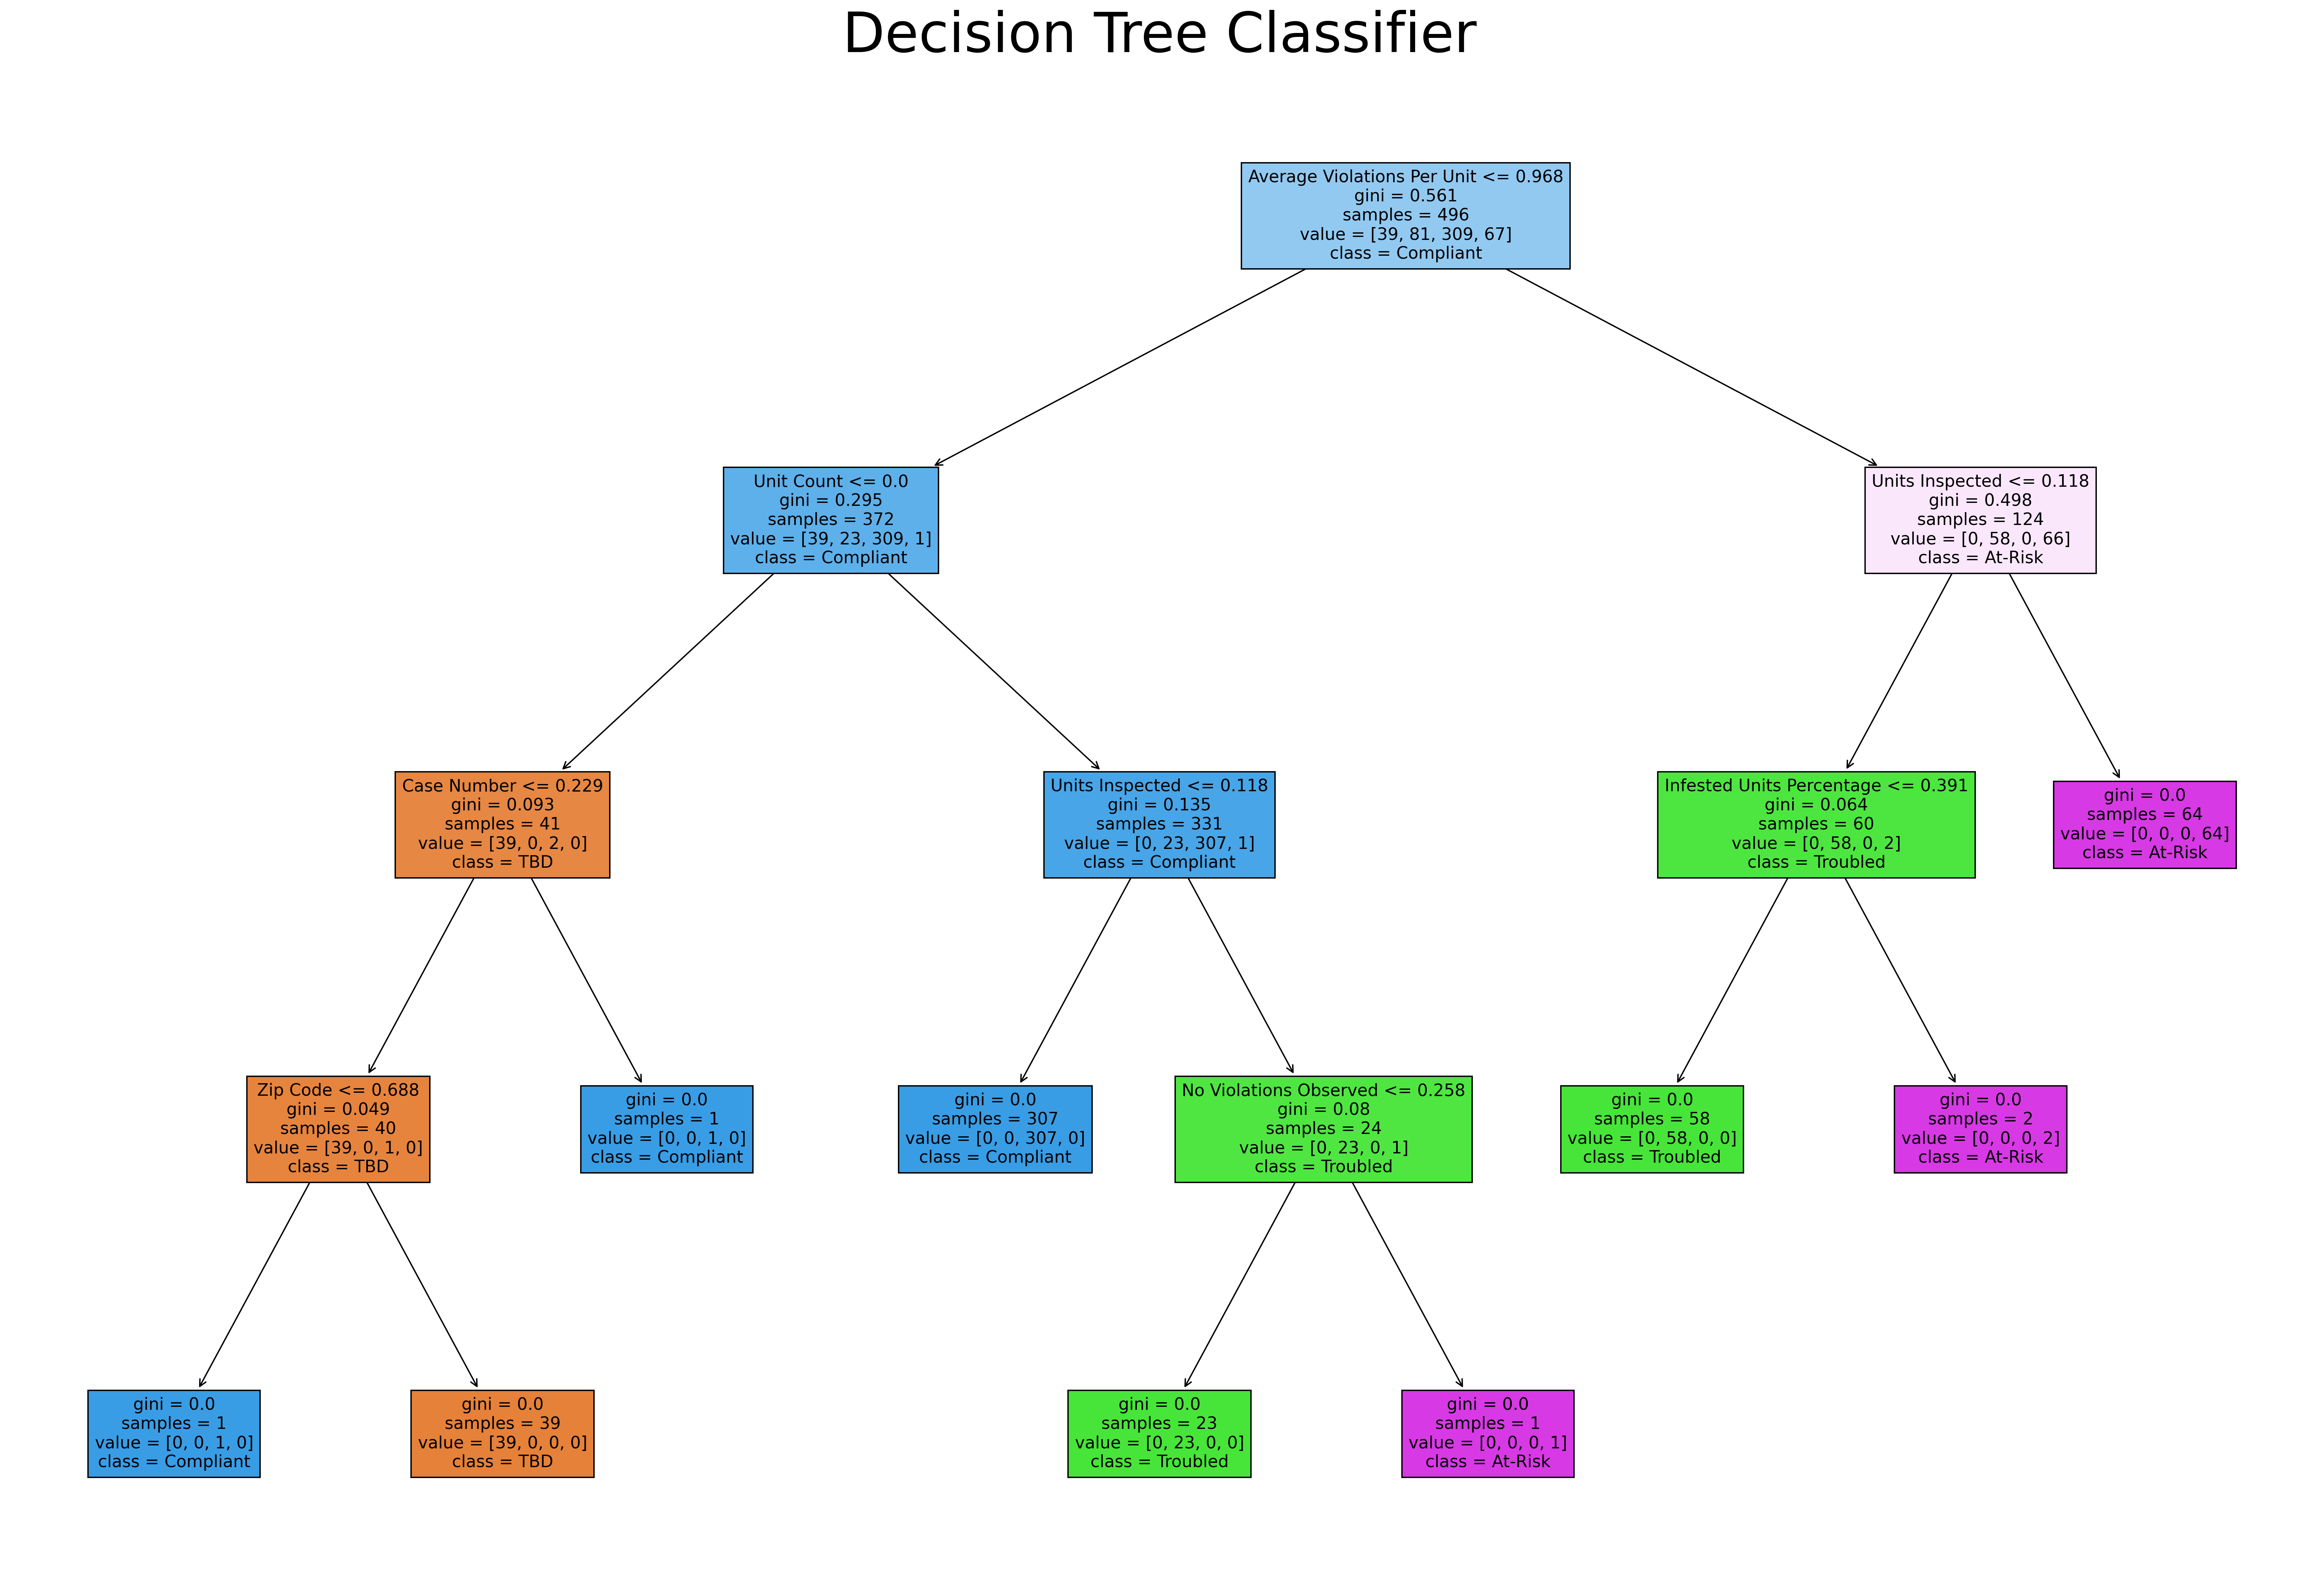

In [ ]:
# Plotting the decision tree classifier

TP_cn = ["TBD","Troubled","Compliant","At-Risk"]
TP_ft = ["Zip Code","Case Number","Unit Count","Units Inspected","Average Violations Per Unit","Severity Index",
         "No Violations Observed","Infested Units Percentage","Units with Mold"]

#Initiate the figure
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,20), dpi=300)

plot_tree(TP_Mod_Tree, class_names = TP_cn, feature_names = TP_ft, filled = True)
plt.title("Decision Tree Classifier", fontsize = 40)
plt.show()

## 3.2 Model 2: Nearest Centroid Classifier

In [ ]:
TP_Mod_Centroid =  NearestCentroid(metric = "euclidean")
TP_Mod_Centroid.fit(X_train,y_train)

C_label_predictions = TP_Mod_Centroid.predict(X_test)
TP_Mod_Centroid_mse = mean_squared_error(y_test, C_label_predictions)
TP_Mod_Centroid_rmse = np.sqrt(TP_Mod_Centroid_mse)


print(f'Centroid model RMSE: {TP_Mod_Centroid_rmse:.2f}')
score_Centroid = accuracy_score(y_test,C_label_predictions)

print(f'Centroid model accuracy is: {score_Centroid * 100}%')

NearestCentroid()

Centroid model RMSE: 1.17
Centroid model accuracy is: 51.61290322580645%


## 3.3 Model 3: KNeighbors Classifier

In [ ]:
#Finding the best k

k_neighbors = [i for i in range(1,32)]
knn_rmse_vals = []

for k in k_neighbors:
  knn_model = KNeighborsClassifier(n_neighbors = k)
  knn_model.fit(X_train,y_train)

  y_hat = knn_model.predict(X_test)
  knn_rmse = mean_squared_error(y_test, y_hat, squared = False)
  knn_rmse_vals.append(knn_rmse)

knn_model_k6 = KNeighborsClassifier(n_neighbors = 6)
knn_model_k6.fit(X_train, y_train)
knn_6_y_hat = knn_model_k6.predict(X_test)




KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=20)

KNeighborsClassifier(n_neighbors=21)

KNeighborsClassifier(n_neighbors=22)

KNeighborsClassifier(n_neighbors=23)

KNeighborsClassifier(n_neighbors=24)

KNeighborsClassifier(n_neighbors=25)

KNeighborsClassifier(n_neighbors=26)

KNeighborsClassifier(n_neighbors=27)

KNeighborsClassifier(n_neighbors=28)

KNeighborsClassifier(n_neighbors=29)

KNeighborsClassifier(n_neighbors=30)

KNeighborsClassifier(n_neighbors=31)

KNeighborsClassifier(n_neighbors=6)

Text(0.5, 1.0, 'K-NN: RMSE changes with k')

Text(0.5, 0, 'k value')

Text(0, 0.5, 'rmse')

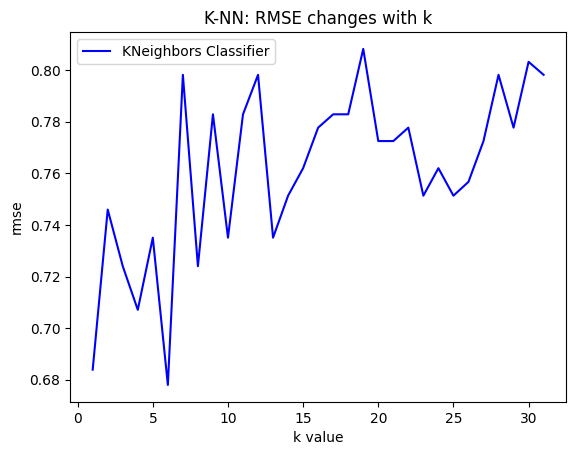

The best k is: 6
The lowest rmse is: 0.6779951469994743
The accuracy of the best KNN Classifier is: 80.64516129032258%


In [ ]:
k_range = range(1,32)
plt.plot( k_range, knn_rmse_vals, label="KNeighbors Classifier", color = 'blue'    )

plt.title("K-NN: RMSE changes with k")
plt.xlabel('k value')
plt.ylabel('rmse')
plt.legend(loc="best")
plt.show()

score_KNN_6 = accuracy_score(y_test, knn_6_y_hat)

print(f"The best k is: {np.argmin(knn_rmse_vals) + 1}")
print(f"The lowest rmse is: {min(knn_rmse_vals)}")
print(f"The accuracy of the best KNN Classifier is: {score_KNN_6 * 100}%")

## 3.4 Model 4: MLPClassifier

In [ ]:
TP_MLP_acc_scores = []
TP_MLP_act_id = []
TP_MLP_act_tanh = []
TP_MLP_act_relu = []

# Make models based on different activation functions

for act in ["identity","tanh","relu"]:

  for n in [n for n in range(100,1000,50)]:

    TP_Mod_MLP = MLPClassifier(hidden_layer_sizes= (n,), activation = act, solver = 'lbfgs')
    TP_Mod_MLP.fit(X_train,y_train)

    MLP_label_Predictions = TP_Mod_MLP.predict(X_test)
    #TP_Mod_MLP_rmse = mean_squared_error(y_test, MLP_label_Predictions, squared = False)

    TP_Mod_MLP_accuracy = accuracy_score(y_test, MLP_label_Predictions)
    TP_MLP_acc_scores.append(TP_Mod_MLP_accuracy)

  #Filter the accuracy scores based on the activation function of each model
  if act == "identity":
    TP_MLP_act_id.extend(TP_MLP_acc_scores)

  elif act == "tanh":
    TP_MLP_act_tanh.extend(TP_MLP_acc_scores)

  elif act == "relu":
    TP_MLP_act_relu.extend(TP_MLP_acc_scores)

TP_MLP_act_id
TP_MLP_act_tanh
TP_MLP_act_relu

#TP_Mod_MLP_rmse = mean_squared_error(y_test, MLP_label_Predictions, squared = False)
#print(f'MLP Classifier model RMSE: {TP_Mod_MLP_rmse:.2f}')
#print(f'MLP Classifier accuracy is: {TP_Mod_MLP_accuracy * 100}%')




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='identity', solver='lbfgs')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='identity', hidden_layer_sizes=(150,), solver='lbfgs')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='identity', hidden_layer_sizes=(200,), solver='lbfgs')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='identity', hidden_layer_sizes=(250,), solver='lbfgs')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='identity', hidden_layer_sizes=(300,), solver='lbfgs')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='identity', hidden_layer_sizes=(350,), solver='lbfgs')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='identity', hidden_layer_sizes=(400,), solver='lbfgs')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='identity', hidden_layer_sizes=(450,), solver='lbfgs')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='identity', hidden_layer_sizes=(500,), solver='lbfgs')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='identity', hidden_layer_sizes=(550,), solver='lbfgs')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='identity', hidden_layer_sizes=(600,), solver='lbfgs')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='identity', hidden_layer_sizes=(650,), solver='lbfgs')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='identity', hidden_layer_sizes=(700,), solver='lbfgs')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='identity', hidden_layer_sizes=(750,), solver='lbfgs')

KeyboardInterrupt: 

In [ ]:
#TP_MLP_act_id[:17]
#TP_MLP_act_tanh[17:35]
#TP_MLP_act_relu[35:]

if (TP_MLP_act_id[:17] == TP_MLP_act_tanh[:17]) and (TP_MLP_act_id[:17] == TP_MLP_act_relu[:17]):
  print("Yes")

if TP_MLP_act_tanh[17:35] == TP_MLP_act_relu[17:35]:
  print("Awesome!")

else:
  print("Wrong list")

Yes
Awesome!


Text(0.5, 0, 'n layers')

Text(0, 0.5, 'Accuracy Score')

Text(0.5, 0, 'n layers')

Text(0, 0.5, 'Accuracy Score')

Text(0.5, 0, 'n layers')

Text(0, 0.5, 'Accuracy Score')

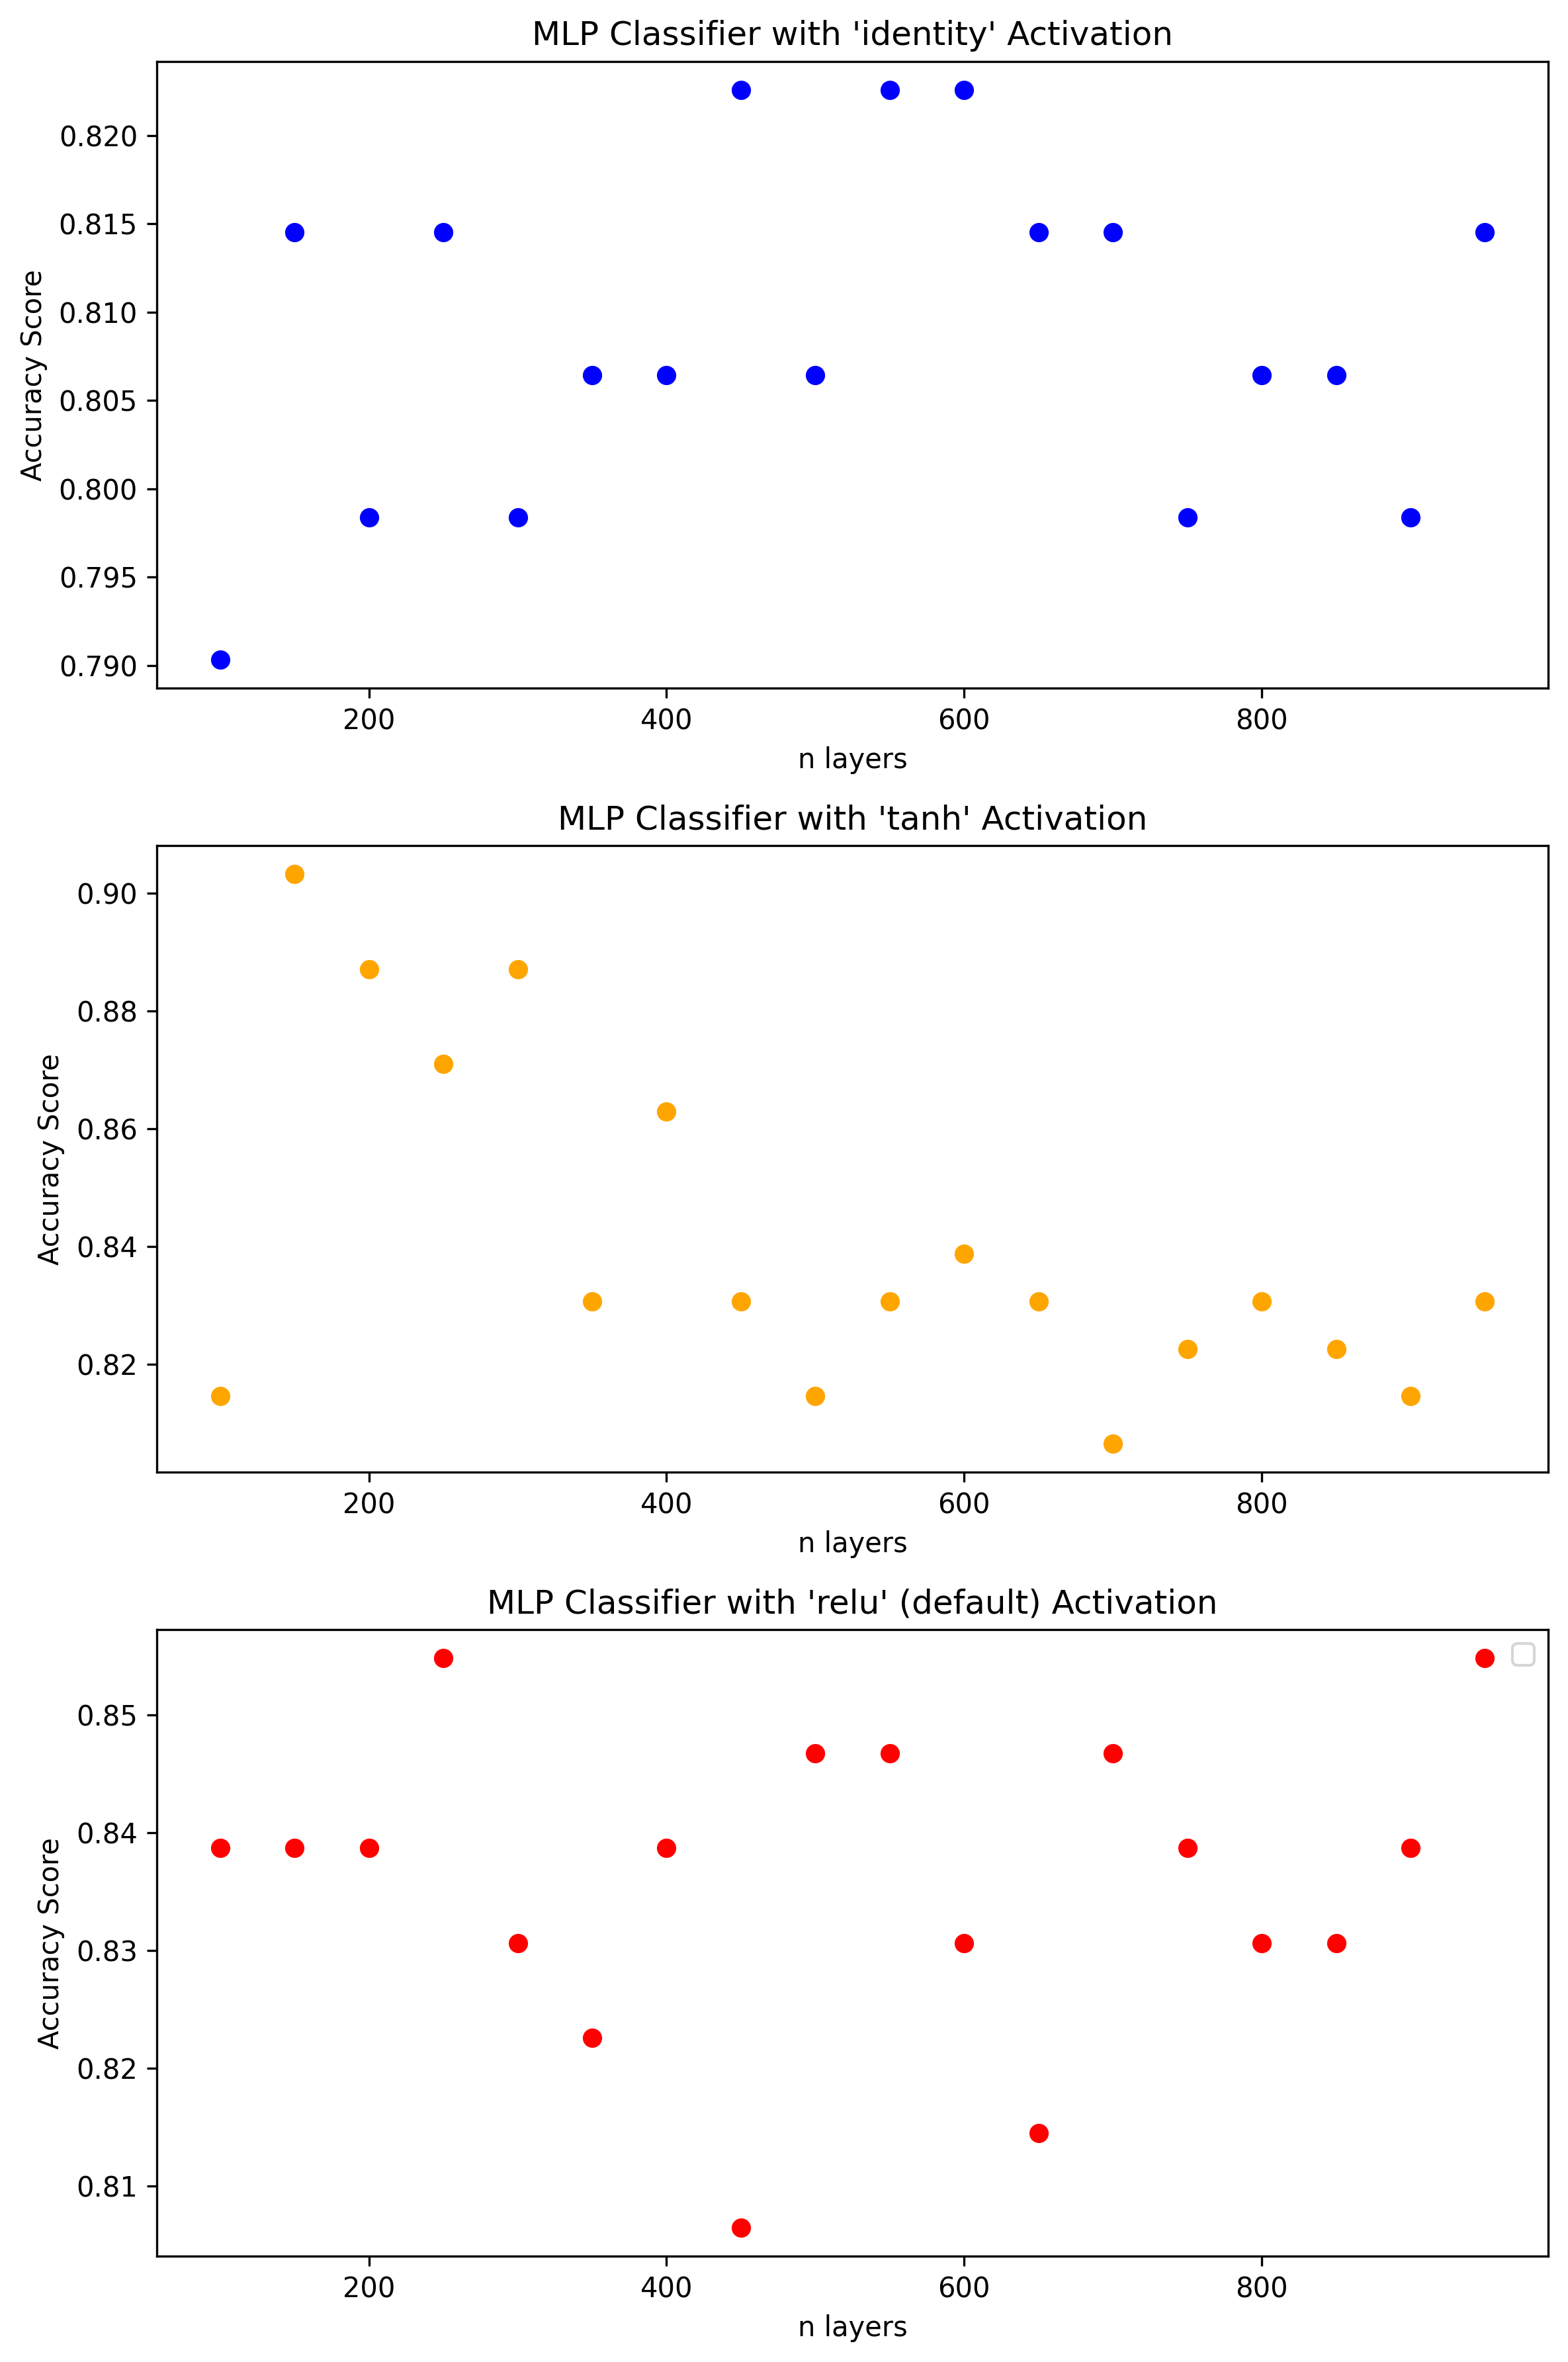

In [ ]:
#Plot the various MLP Classifiers to see which is the best

N_layer_range = range(100,1000,50)

fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (8,12), dpi=300)

ax[0].scatter(N_layer_range, TP_MLP_act_id, color = "blue")
ax[0].title.set_text("MLP Classifier with 'identity' Activation")
ax[0].set_xlabel("n layers")
ax[0].set_ylabel("Accuracy Score")

ax[1].scatter(N_layer_range, TP_MLP_act_tanh[17:35], color = "orange")
ax[1].title.set_text("MLP Classifier with 'tanh' Activation")
ax[1].set_xlabel("n layers")
ax[1].set_ylabel("Accuracy Score")

ax[2].scatter(N_layer_range, TP_MLP_act_relu[36:], color = "red")
ax[2].title.set_text("MLP Classifier with 'relu' (default) Activation")
ax[2].set_xlabel("n layers")
ax[2].set_ylabel("Accuracy Score")

fig.tight_layout()
plt.legend(loc="best")
plt.show()


In [ ]:
#Find the best model given n layers and accuracy score
"""
From the graph of the accuracy for "MLP Classifier with 'tanh' Activation",
we see that the corresponding classifier (MLP with tanh activation) returns the highest accuracy of
all the MLP classifiers used.
"""

print(f'\nThe highest accuracy is: {(max(TP_MLP_act_tanh[17:35]))*100}%')
print(f'The best optimal hidden layer size is: {np.argmax(TP_MLP_act_tanh[17:35])*50 + 100}')


' \nFrom the graph of the accuracy for "MLP Classifier with \'tanh\' Activation", \nwe see that the corresponding classifier (MLP with tanh activation) returns the highest accuracy of\nall the MLP classifiers used.\n\n\n'


The highest accuracy is: 90.32258064516128%
The best optimal hidden layer size is: 150


# 4. Conclusion

<Axes: >

Text(0.5, 1.0, 'Model Accuracy Comparison')

Text(0, 0.5, 'Testing Accurcay (%)')

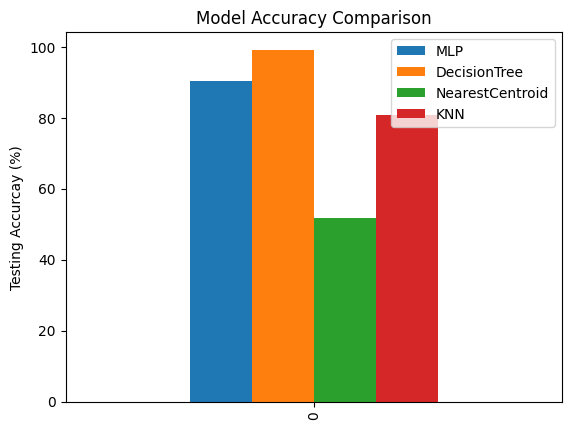

In [ ]:
#Plot the testing accuracy across all models

Test_Accuracy_scores_combined = pd.DataFrame({"MLP":[90.32],"DecisionTree":[99.18],
                                  "NearestCentroid":[51.61],"KNN":[80.64]})

Test_Accuracy_scores_combined.plot(kind= "bar")
plt.legend(loc= "upper right")
plt.title("Model Accuracy Comparison")
plt.ylabel("Testing Accurcay (%)")
plt.show()